# Context
### Loan default prediction is a common problem in the financial industry, as it can help lenders or banks identify borrowers who are likely to default on their loans. This information can be further used to adjust loan terms/conditions, reserve additional funds to cover potential losses, or even deny/refuse loans to high-risk borrowers. In this case study, we will develop a machine learning-based solution to predict loan default.


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #Advanced data visualization
import matplotlib.pyplot as plt #data visualization

In [2]:
data = pd.read_csv("C:/Users/Charanteja/Downloads/lending_club_loan_dataset.csv")

In [3]:
data.head() #Top n rows of dataset

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [4]:
data.info() #dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     20000 non-null  int64  
 1   grade                  20000 non-null  object 
 2   annual_inc             20000 non-null  float64
 3   short_emp              20000 non-null  int64  
 4   emp_length_num         20000 non-null  int64  
 5   home_ownership         18509 non-null  object 
 6   dti                    19846 non-null  float64
 7   purpose                20000 non-null  object 
 8   term                   20000 non-null  object 
 9   last_delinq_none       20000 non-null  int64  
 10  last_major_derog_none  574 non-null    float64
 11  revol_util             20000 non-null  float64
 12  total_rec_late_fee     20000 non-null  float64
 13  od_ratio               20000 non-null  float64
 14  bad_loan               20000 non-null  int64  
dtypes:

In [5]:
data.describe() # Summary statistics of numerical columns

,id,annual_inc,short_emp,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
count,2.000000e+04,20000.000000,20000.000000,20000.00000,19846.000000,20000.000000,574.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,7.590662e+06,73349.578350,0.112500,6.82140,16.587841,0.546600,0.759582,55.958148,0.290622,0.504430,0.20000
std,1.609593e+06,45198.567255,0.315989,3.77423,7.585812,0.497836,0.427710,42.117456,3.108654,0.287720,0.40001
min,5.860400e+05,8412.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.00000
25%,6.206283e+06,47000.000000,0.000000,3.00000,10.852500,0.000000,1.000000,38.800000,0.000000,0.257356,0.00000
50%,7.378896e+06,65000.000000,0.000000,7.00000,16.190000,1.000000,1.000000,57.100000,0.000000,0.506681,0.00000
75%,8.766235e+06,88000.000000,0.000000,11.00000,22.060000,1.000000,1.000000,73.900000,0.000000,0.753771,0.00000
max,1.145464e+07,1000000.000000,1.000000,11.00000,34.990000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.00000


In [6]:
data.shape #data size

(20000, 15)

In [7]:
data.dtypes #data types

id                         int64
grade                     object
annual_inc               float64
short_emp                  int64
emp_length_num             int64
home_ownership            object
dti                      float64
purpose                   object
term                      object
last_delinq_none           int64
last_major_derog_none    float64
revol_util               float64
total_rec_late_fee       float64
od_ratio                 float64
bad_loan                   int64
dtype: object

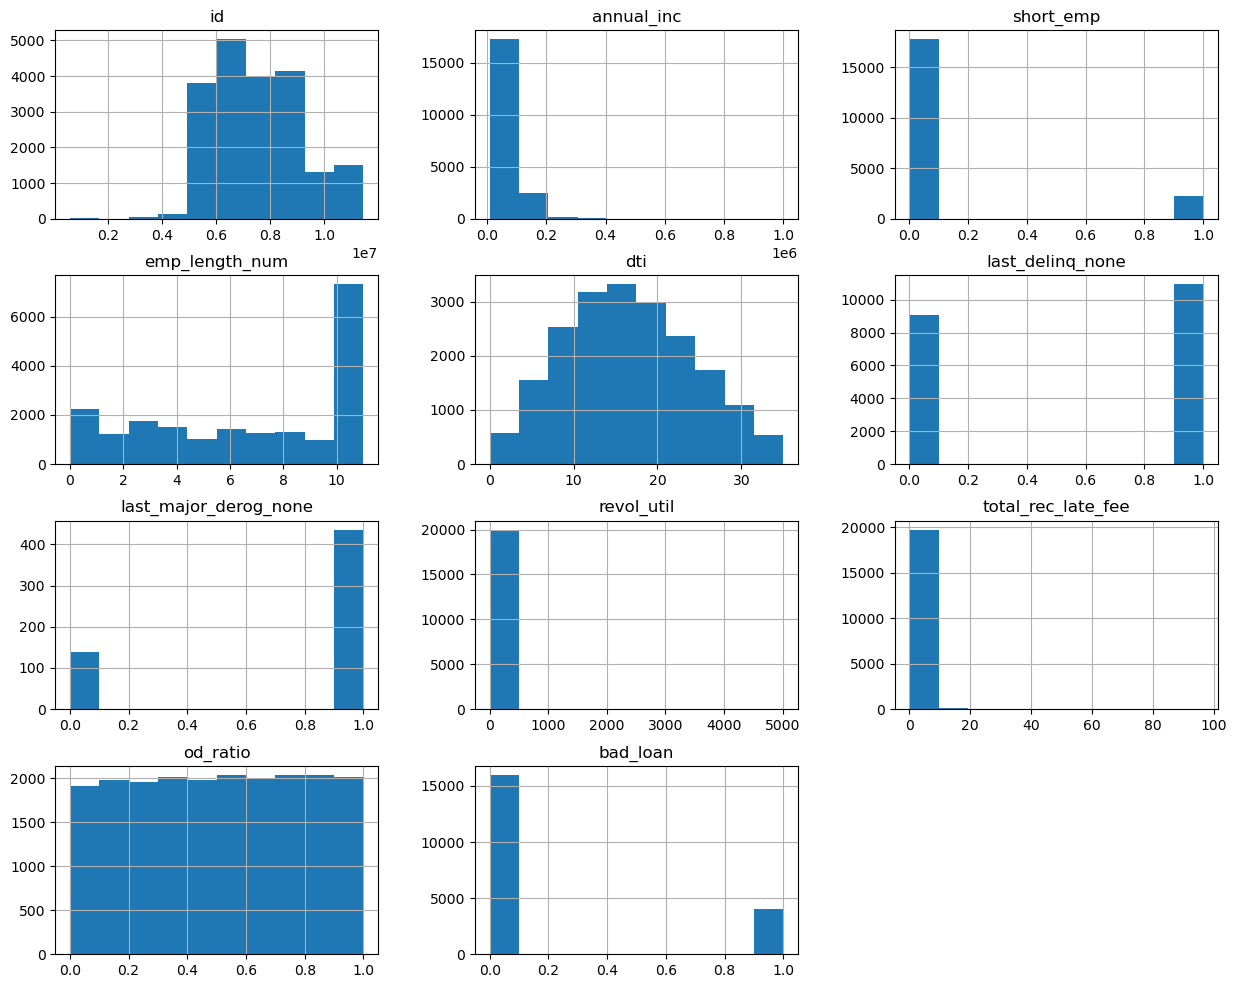

In [8]:
data.hist(figsize=(15, 12))
plt.show()

<Axes: >

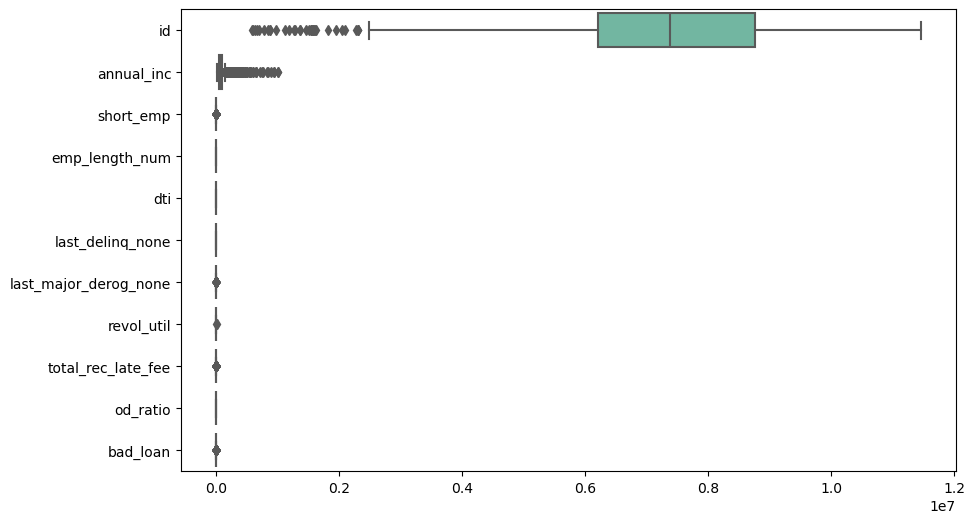

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, orient="h", palette="Set2")

<Axes: >

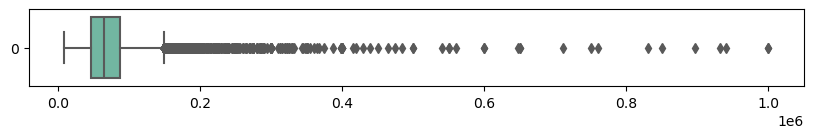

In [19]:
plt.figure(figsize=(10, 1))
sns.boxplot(data=data["annual_inc"], orient="h", palette="Set2")

In [13]:
data.columns

Index(['id', 'grade', 'annual_inc', 'short_emp', 'emp_length_num',
       'home_ownership', 'dti', 'purpose', 'term', 'last_delinq_none',
       'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'od_ratio',
       'bad_loan'],
      dtype='object')

In [20]:
q3 = data["annual_inc"].quantile(0.75)
q3

88000.0

In [21]:
q1 = data["annual_inc"].quantile(0.25)
q1

47000.0

In [22]:
IQR = q3-q1
IQR

41000.0

In [23]:
lower_range = q1 - (1.5 * IQR)
upper_range = q3 + (1.5 * IQR)

In [24]:
lower_range

-14500.0

In [25]:
upper_range

149500.0

In [30]:
annual_inc_olfree = []
for i in data["annual_inc"]:
    if i < lower_range:
        annual_inc_olfree.append(lower_range)
    elif i > upper_range:
        annual_inc_olfree.append(upper_range)
    else:
        annual_inc_olfree.append(i)

In [31]:
data["annual_inc_olfree"] = annual_inc_olfree

<Axes: >

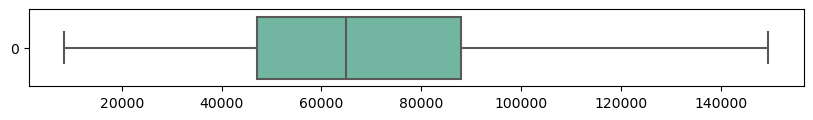

In [32]:
plt.figure(figsize=(10, 1))
sns.boxplot(data=data["annual_inc_olfree"], orient="h", palette="Set2")

In [33]:
data.columns

Index(['id', 'grade', 'annual_inc', 'short_emp', 'emp_length_num',
       'home_ownership', 'dti', 'purpose', 'term', 'last_delinq_none',
       'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'od_ratio',
       'bad_loan', 'annual_inc_olfree'],
      dtype='object')

In [35]:
corrln = data[['annual_inc', 'emp_length_num','dti', 'last_delinq_none',
       'last_major_derog_none', 'revol_util', 'total_rec_late_fee', 'od_ratio',
       'bad_loan', 'annual_inc_olfree']].corr()

In [36]:
corrln

,annual_inc,emp_length_num,dti,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,annual_inc_olfree
annual_inc,1.000000,0.118024,-0.230219,-0.080378,0.023281,0.016951,0.014713,-0.004953,-0.092402,0.852895
emp_length_num,0.118024,1.000000,0.009369,-0.053371,-0.158177,0.027390,-0.012382,0.004446,-0.041420,0.149253
dti,-0.230219,0.009369,1.000000,0.030379,0.004079,0.098673,0.011072,0.005571,0.141884,-0.241359
last_delinq_none,-0.080378,-0.053371,0.030379,1.000000,0.603267,0.013373,-0.011000,-0.001996,0.021494,-0.092050
last_major_derog_none,0.023281,-0.158177,0.004079,0.603267,1.000000,-0.027597,-0.086395,0.050211,-0.013770,0.007951
revol_util,0.016951,0.027390,0.098673,0.013373,-0.027597,1.000000,0.008435,-0.008228,0.053682,0.028784
total_rec_late_fee,0.014713,-0.012382,0.011072,-0.011000,-0.086395,0.008435,1.000000,-0.002354,0.130233,0.006601
od_ratio,-0.004953,0.004446,0.005571,-0.001996,0.050211,-0.008228,-0.002354,1.000000,0.000403,-0.003063
bad_loan,-0.092402,-0.041420,0.141884,0.021494,-0.013770,0.053682,0.130233,0.000403,1.000000,-0.120667
annual_inc_olfree,0.852895,0.149253,-0.241359,-0.092050,0.007951,0.028784,0.006601,-0.003063,-0.120667,1.000000


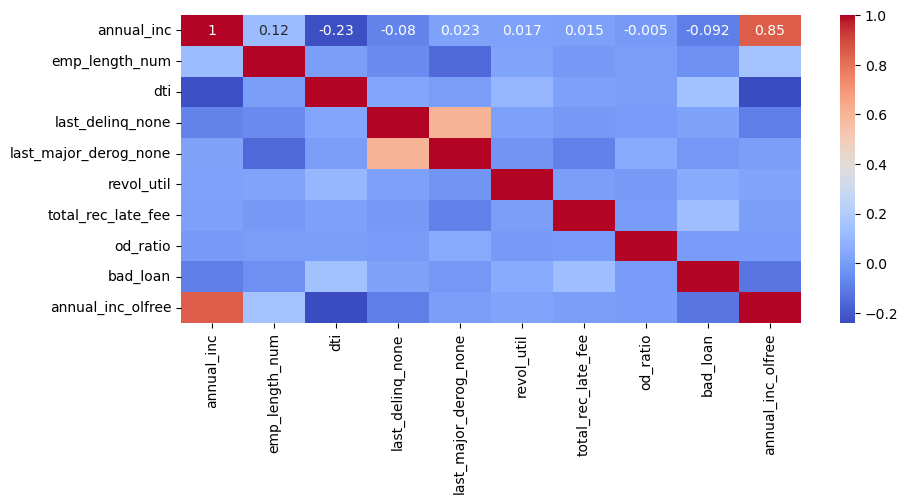

In [37]:
plt.figure(figsize=(10, 4))
sns.heatmap(corrln, annot=True, cmap='coolwarm')
plt.show()

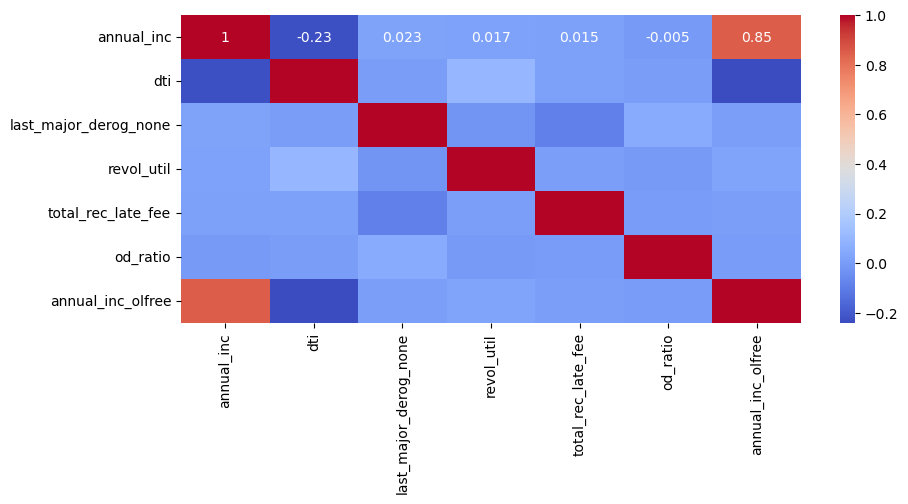

In [38]:
collist = []
for col_name in data.columns:
    if (data[col_name].dtypes==int) or (data[col_name].dtypes==float):
       collist.append(col_name)
correlation_matrix = data[collist].corr()


# Heatmap of the correlation matrix
plt.figure(figsize=(10, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [32]:
#data['AreaCode']= data["Area Code"].astype(str)
#data['Churn']= data.Churn.astype(str)

In [40]:
data.dtypes

id                         int64
grade                     object
annual_inc               float64
short_emp                  int64
emp_length_num             int64
home_ownership            object
dti                      float64
purpose                   object
term                      object
last_delinq_none           int64
last_major_derog_none    float64
revol_util               float64
total_rec_late_fee       float64
od_ratio                 float64
bad_loan                   int64
annual_inc_olfree        float64
dtype: object

In [41]:
data.isnull().any()

id                       False
grade                    False
annual_inc               False
short_emp                False
emp_length_num           False
home_ownership            True
dti                       True
purpose                  False
term                     False
last_delinq_none         False
last_major_derog_none     True
revol_util               False
total_rec_late_fee       False
od_ratio                 False
bad_loan                 False
annual_inc_olfree        False
dtype: bool

In [42]:
data.isnull().values.sum()

21071

In [43]:
data.isnull().values.any()

True

In [46]:
dti_dummy = data["dti"].fillna(data["dti"].mean(), inplace=True)

In [10]:
data['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

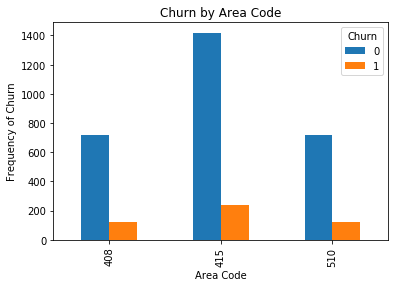

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(data.AreaCode,data.Churn).plot(kind='bar')
plt.title('Churn by Area Code')
plt.xlabel('Area Code')
plt.ylabel('Frequency of Churn')
plt.savefig('Area_wise_bar_chart')

In [11]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
data["Area_code"] = lb_make.fit_transform(data["AreaCode"])
data["State_code"] = lb_make.fit_transform(data["State"])


In [12]:
data.shape

(3333, 23)

In [13]:
data.head()

,Phone,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,...,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,State,AreaCode,Churn,Area_code,State_code
0,382-4657,128,25,265.1,197.4,244.7,10.0,1,0,1,...,16.78,91,11.01,3,2.70,KS,415,0,1,16
1,371-7191,107,26,161.6,195.5,254.4,13.7,1,0,1,...,16.62,103,11.45,3,3.70,OH,415,0,1,35
2,358-1921,137,0,243.4,121.2,162.6,12.2,0,0,0,...,10.30,104,7.32,5,3.29,NJ,415,0,1,31
3,375-9999,84,0,299.4,61.9,196.9,6.6,2,1,0,...,5.26,89,8.86,7,1.78,OH,408,0,0,35
4,330-6626,75,0,166.7,148.3,186.9,10.1,3,1,0,...,12.61,121,8.41,3,2.73,OK,415,0,1,36


In [15]:
d_vars=data.columns.values.tolist()

z=['State','AreaCode', 'Churn']
x1=[i for i in d_vars if i not in z]

In [16]:
print(x1)

['Phone', 'Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CustServ Calls', "Int'l Plan", 'VMail Plan', 'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge', 'Area_code', 'State_code']


In [17]:
cols = ['Account Length', 'VMail Message', 'Day Mins', 'Eve Mins', 'Night Mins', 'Intl Mins', 'CustServ Calls', "Int'l Plan", 'VMail Plan', 'Day Calls', 'Day Charge', 'Eve Calls', 'Eve Charge', 'Night Calls', 'Night Charge', 'Intl Calls', 'Intl Charge', 'Area_code', 'State_code']

In [18]:
x=data[cols]
y=data['Churn']

In [19]:
print(x)

      Account Length  VMail Message  Day Mins  Eve Mins  Night Mins  \
0                128             25     265.1     197.4       244.7   
1                107             26     161.6     195.5       254.4   
2                137              0     243.4     121.2       162.6   
3                 84              0     299.4      61.9       196.9   
4                 75              0     166.7     148.3       186.9   
5                118              0     223.4     220.6       203.9   
6                121             24     218.2     348.5       212.6   
7                147              0     157.0     103.1       211.8   
8                117              0     184.5     351.6       215.8   
9                141             37     258.6     222.0       326.4   
10                65              0     129.1     228.5       208.8   
11                74              0     187.7     163.4       196.0   
12               168              0     128.8     104.9       141.1   
13    

In [20]:
print(y)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      1
11      0
12      0
13      0
14      0
15      1
16      0
17      0
18      0
19      0
20      0
21      1
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
3303    0
3304    1
3305    0
3306    0
3307    0
3308    0
3309    0
3310    0
3311    0
3312    0
3313    0
3314    0
3315    0
3316    0
3317    0
3318    0
3319    0
3320    1
3321    0
3322    1
3323    1
3324    0
3325    0
3326    0
3327    0
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int64


In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.cross_validation import train_test_split


In [22]:
#Decision Tree model

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)


In [24]:
DTC = DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [25]:
Preds= DTC.predict(X_test)

In [27]:
X_test.shape

(1000, 19)

In [26]:
Preds

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,

In [28]:
from sklearn.metrics import accuracy_score
print('DT accuracy: {:.3f}'.format(accuracy_score(y_test, DTC.predict(X_test))))

DT accuracy: 0.898


In [29]:

from sklearn.metrics import classification_report
print(classification_report(y_test, DTC.predict(X_test)))

             precision    recall  f1-score   support

          0       0.96      0.92      0.94       862
          1       0.60      0.77      0.68       138

avg / total       0.91      0.90      0.90      1000



Text(0.5,1,'Decision Tree Classification')

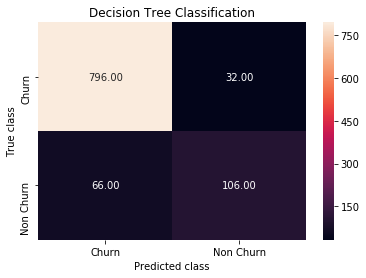

In [28]:
pred = DTC.predict(X_test)
from sklearn.metrics import confusion_matrix
import seaborn as sns
forest_cm = metrics.confusion_matrix(pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Churn", "Non Churn"] , yticklabels = ["Churn", "Non Churn"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Decision Tree Classification')

In [30]:
preds_df = pd.DataFrame(Preds)
preds_df

,0
0,0
1,0
2,0
3,0
4,1
5,1
6,1
7,0
8,0
9,0


In [31]:
preds_df[0].value_counts()

0    824
1    176
Name: 0, dtype: int64

In [32]:
X_test.head()

,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,Day Calls,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area_code,State_code
405,92,0,264.3,160.9,198.6,9.3,0,1,0,91,44.93,115,13.68,73,8.94,5,2.51,1,48
118,112,36,113.7,157.5,177.6,10.0,2,0,1,117,19.33,82,13.39,118,7.99,3,2.70,2,24
710,69,0,195.3,216.7,259.9,12.5,3,0,0,70,33.20,108,18.42,119,11.70,4,3.38,2,42
499,95,0,175.2,244.4,75.8,7.5,1,0,0,91,29.78,109,20.77,95,3.41,2,2.03,1,49
2594,115,0,345.3,203.4,217.5,11.8,1,1,0,81,58.70,106,17.29,107,9.79,8,3.19,2,35


In [33]:
X_test2 = X_test.reset_index

In [34]:
n_pred = X_test2()
n_pred["Preds"] = preds_df
n_pred

,index,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,...,Day Charge,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area_code,State_code,Preds
0,405,92,0,264.3,160.9,198.6,9.3,0,1,0,...,44.93,115,13.68,73,8.94,5,2.51,1,48,0
1,118,112,36,113.7,157.5,177.6,10.0,2,0,1,...,19.33,82,13.39,118,7.99,3,2.70,2,24,0
2,710,69,0,195.3,216.7,259.9,12.5,3,0,0,...,33.20,108,18.42,119,11.70,4,3.38,2,42,0
3,499,95,0,175.2,244.4,75.8,7.5,1,0,0,...,29.78,109,20.77,95,3.41,2,2.03,1,49,0
4,2594,115,0,345.3,203.4,217.5,11.8,1,1,0,...,58.70,106,17.29,107,9.79,8,3.19,2,35,1
5,1977,49,0,237.8,208.9,167.8,15.6,2,1,0,...,40.43,119,17.76,86,7.55,6,4.21,1,40,1
6,1892,147,0,225.2,184.9,143.2,9.9,0,1,0,...,38.28,98,15.72,146,6.44,1,2.67,1,48,1
7,1463,87,0,156.8,215.8,223.3,7.6,1,0,0,...,26.66,68,18.34,77,10.05,6,2.05,1,13,0
8,565,97,0,211.0,189.0,123.0,4.7,3,0,0,...,35.87,100,16.07,102,5.54,4,1.27,2,21,0
9,2114,123,0,260.9,168.5,178.3,13.3,3,0,0,...,44.35,103,14.32,91,8.02,5,3.59,0,43,0


In [35]:
y_test2 = y_test.reset_index(drop=True)

In [36]:
y_test2

0      0
1      0
2      0
3      0
4      1
5      1
6      1
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     1
15     0
16     0
17     0
18     0
19     0
20     1
21     0
22     0
23     0
24     0
25     0
26     0
27     0
28     0
29     0
      ..
970    0
971    0
972    0
973    0
974    0
975    0
976    1
977    1
978    1
979    0
980    0
981    0
982    0
983    0
984    0
985    0
986    0
987    0
988    1
989    0
990    0
991    0
992    0
993    0
994    0
995    0
996    0
997    0
998    0
999    0
Name: Churn, Length: 1000, dtype: int64

In [37]:
n_pred["Actuals"] = y_test2
n_pred

,index,Account Length,VMail Message,Day Mins,Eve Mins,Night Mins,Intl Mins,CustServ Calls,Int'l Plan,VMail Plan,...,Eve Calls,Eve Charge,Night Calls,Night Charge,Intl Calls,Intl Charge,Area_code,State_code,Preds,Actuals
0,405,92,0,264.3,160.9,198.6,9.3,0,1,0,...,115,13.68,73,8.94,5,2.51,1,48,0,0
1,118,112,36,113.7,157.5,177.6,10.0,2,0,1,...,82,13.39,118,7.99,3,2.70,2,24,0,0
2,710,69,0,195.3,216.7,259.9,12.5,3,0,0,...,108,18.42,119,11.70,4,3.38,2,42,0,0
3,499,95,0,175.2,244.4,75.8,7.5,1,0,0,...,109,20.77,95,3.41,2,2.03,1,49,0,0
4,2594,115,0,345.3,203.4,217.5,11.8,1,1,0,...,106,17.29,107,9.79,8,3.19,2,35,1,1
5,1977,49,0,237.8,208.9,167.8,15.6,2,1,0,...,119,17.76,86,7.55,6,4.21,1,40,1,1
6,1892,147,0,225.2,184.9,143.2,9.9,0,1,0,...,98,15.72,146,6.44,1,2.67,1,48,1,1
7,1463,87,0,156.8,215.8,223.3,7.6,1,0,0,...,68,18.34,77,10.05,6,2.05,1,13,0,0
8,565,97,0,211.0,189.0,123.0,4.7,3,0,0,...,100,16.07,102,5.54,4,1.27,2,21,0,0
9,2114,123,0,260.9,168.5,178.3,13.3,3,0,0,...,103,14.32,91,8.02,5,3.59,0,43,0,0


In [38]:
n_pred.shape

(1000, 22)

In [74]:
n_pred.to_csv("Predicted_file.csv")